In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("basic_test_results.csv")

In [3]:
results.head()

,Data Type,Query Name,Average
0,Pandas,Query 1,2.28


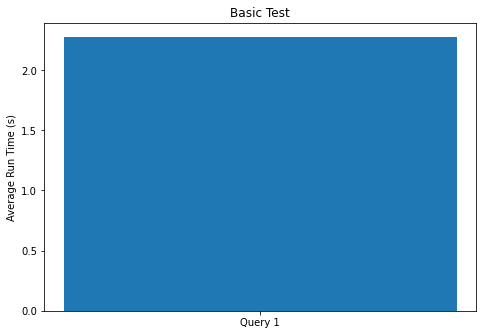

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(results['Query Name'], results['Average'])
plt.title("Basic Test")
plt.ylabel("Average Run Time (s)")
plt.show()